# Capstone Project

Name :- Pratik Sudhakar Narkhede                               

Batch:- DSJul01
    
Task:- Correlation between views and likes for YouTube



# Importing important libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Importing all csv files

In [2]:
dataCA = pd.read_csv(r'CAvideos.csv')
print('done1')
dataDE = pd.read_csv(r'DEvideos.csv')
print('done2')
dataFR = pd.read_csv(r'FRvideos.csv')
print('done3')
dataGB = pd.read_csv(r'GBvideos.csv')
print('done4')
dataIN = pd.read_csv(r'INvideos.csv')
print('done5')
dataJP = pd.read_csv(r'JPvideos.csv',encoding='latin1')
print('done6')
dataKR = pd.read_csv(r'KRvideos.csv',encoding='latin1')
print('done7')
dataMX = pd.read_csv(r'MXvideos.csv',encoding='latin1')
print('done8')
dataRU = pd.read_csv(r'RUvideos.csv',encoding='latin1')
print('done9')

done1
done2
done3
done4
done5
done6
done7
done8
done9


In [3]:
USdata = pd.read_csv(r'Usvideos.csv')

In [4]:
dataCA.shape
print(dataDE.shape)
print(dataFR.shape)
print(dataGB.shape)
print(dataIN.shape)
print(dataJP.shape)
print(dataKR.shape)
print(dataMX.shape)
print(dataRU.shape)

(40840, 16)
(40724, 16)
(38916, 16)
(37352, 16)
(20523, 16)
(34567, 16)
(40451, 16)
(40739, 16)


In [5]:
dataDE.shape[0]+dataCA.shape[0]+dataFR.shape[0]+dataGB.shape[0]+dataIN.shape[0]+dataJP.shape[0]+dataKR.shape[0]+dataMX.shape[0]+dataRU.shape[0]

334993

# Merging all csv files as world data excluding US data

In [6]:
world_data = pd.merge(dataCA, dataDE, how='outer')
world_data = pd.merge(world_data, dataFR, how='outer')
world_data = pd.merge(world_data, dataGB, how='outer')
world_data = pd.merge(world_data, dataIN, how='outer')
world_data = pd.merge(world_data, dataJP, how='outer')
world_data = pd.merge(world_data, dataKR, how='outer')
world_data = pd.merge(world_data, dataMX, how='outer')
world_data = pd.merge(world_data, dataRU, how='outer')


In [7]:
world_data.shape

(321656, 16)

In [248]:
UScorr = USdata[['views','likes']]

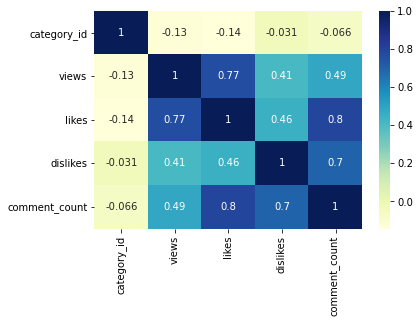

In [247]:
sns.heatmap(world_data.corr(),annot = True, cmap = 'YlGnBu' )

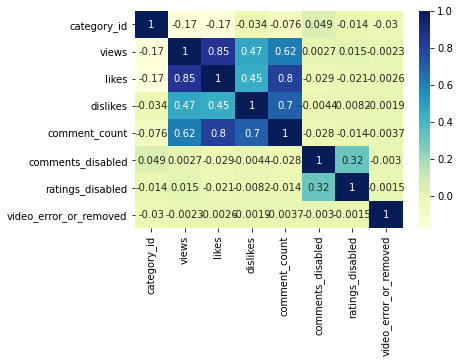

In [218]:
sns.heatmap(USdata.corr(), annot = True, cmap = 'YlGnBu')

In [29]:
world_data_corr = world_data[['likes','views']]

# Correlation between views and likes for YouTube

Correlation between views and likes for world data

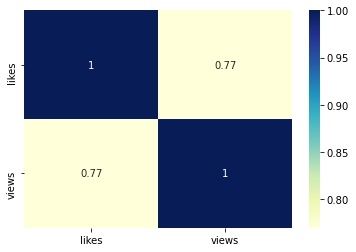

In [30]:
sns.heatmap(world_data_corr.corr(), annot = True, cmap = 'YlGnBu')

Correlation between views and likes for US data

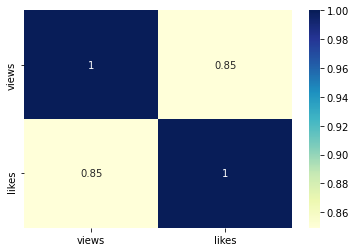

In [251]:
sns.heatmap(UScorr.corr(), annot = True, cmap = 'YlGnBu')

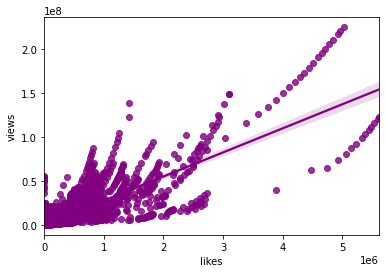

In [32]:
sns.regplot(data2['likes'],data2['views'], color = 'Purple')

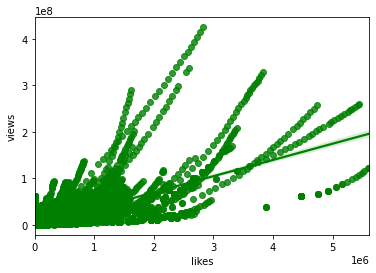

In [254]:
sns.regplot(world_data['likes'],world_data['views'], color = 'Green')

# Conclusion

We can see that there is a high correlation between the number of likes on a video and the number of views. 
correlation between the number of likes on a video and the number of views is more in US data(i.e 0.85) than world data (i.e 0.77)
also there is a strong correlation between comment count and number of likes

1 indicates a strong positive relationship.

-1 indicates a strong negative relationship.

A result of zero indicates no relationship at all.


In [257]:
world_data.corr().style.background_gradient()

,category_id,views,likes,dislikes,comment_count
category_id,1.000000,-0.128274,-0.142538,-0.030762,-0.065806
views,-0.128274,1.000000,0.769478,0.413686,0.488781
likes,-0.142538,0.769478,1.000000,0.455167,0.797930
dislikes,-0.030762,0.413686,0.455167,1.000000,0.699429
comment_count,-0.065806,0.488781,0.797930,0.699429,1.000000


In [255]:
USdata.corr().style.background_gradient()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.168231,-0.173921,-0.033547,-0.076307,0.048949,-0.013506,-0.030011
views,-0.168231,1.000000,0.849177,0.472213,0.617621,0.002677,0.015355,-0.002256
likes,-0.173921,0.849177,1.000000,0.447186,0.803057,-0.028918,-0.020888,-0.002641
dislikes,-0.033547,0.472213,0.447186,1.000000,0.700184,-0.004431,-0.008230,-0.001853
comment_count,-0.076307,0.617621,0.803057,0.700184,1.000000,-0.028277,-0.013819,-0.003725
comments_disabled,0.048949,0.002677,-0.028918,-0.004431,-0.028277,1.000000,0.319230,-0.002970
ratings_disabled,-0.013506,0.015355,-0.020888,-0.008230,-0.013819,0.319230,1.000000,-0.001526
video_error_or_removed,-0.030011,-0.002256,-0.002641,-0.001853,-0.003725,-0.002970,-0.001526,1.000000


# ML Models

In [ ]:
world_data.drop(columns = ['video_id','trending_date','title','channel_title','category_id','publish_time','tags','dislikes','comment_count','thumbnail_link','comments_disabled','ratings_disabled','video_error_or_removed','description'],axis = 1, inplace = True)

In [ ]:
new_world = world_data

In [ ]:
new_world.to_csv('new_world.csv',index = False)

In [ ]:
new_world1 = pd.read_csv('new_world.csv')

In [ ]:
x = new_world1.drop(columns = ['likes'])
y = new_world['likes']

In [54]:
from sklearn.linear_model import LinearRegression


In [55]:
lr = LinearRegression()

In [56]:
lr

LinearRegression()

In [ ]:
x = new_world1.drop(columns = ['likes'])
y = new_world['likes']

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
#splitting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=0)

In [114]:
#fit te model
lr.fit(x_train,y_train)

LinearRegression()

In [122]:
pred = lr.predict(x_test)

In [127]:
!pip install scikit-learn

In [129]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
r2_score(pred,y_test) * 100

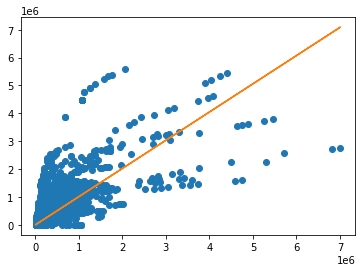

In [125]:
plt.plot(pred, y_test, 'o')
m, b = np.polyfit(pred, y_test, 1)
plt.plot(pred, m*pred + b)

# Linear Regression with feature scaling

In [133]:
from sklearn.preprocessing import MinMaxScaler

In [134]:
scaler = MinMaxScaler()

In [135]:
# Apply scaler() to all the columns except the 'dummy' variables

scaled = scaler.fit_transform(new_world1)

In [137]:
scaled_xtrain = scaler.fit_transform(x_train)

In [156]:
scaled_x_test = scaler.transform(x_test)

In [146]:
y_train = pd.DataFrame(y_train)

In [147]:
scaled_y_train = scaler.transform(y_train)

In [148]:
y_test = pd.DataFrame(y_test)

In [149]:
scaled_y_test = scaler.transform(y_test)

In [150]:
lr1 = LinearRegression()

In [151]:
lr1

LinearRegression()

In [152]:
lr1.fit(scaled_xtrain,scaled_y_train)

LinearRegression()

In [157]:
pred1 = lr1.predict(scaled_x_test)

In [203]:
lr1.score(pred1,scaled_y_test) * 100

0.5483463433740399

In [201]:
kfold = KFold(n_splits=10, random_state=7, shuffle = True)
results = cross_val_score(lr1, scaled_xtrain,scaled_y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 59.28% (3.91%)


# XGBoost

In [165]:
import xgboost as xgb

In [164]:
!pip install xgboost

In [169]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [179]:
xg_reg.fit(scaled_xtrain,scaled_y_train)

preds = xg_reg.predict(scaled_x_test)

[12:02:49] WARNING: d:\bld\xgboost-split_1615294821523\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [180]:
rmse = np.sqrt(mean_squared_error(scaled_y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.174344


KFold CV

In [196]:
#KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# CV model
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(xg_reg, x_train, y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

C:\Users\Pratik\Anaconda python\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


[12:44:43] WARNING: d:\bld\xgboost-split_1615294821523\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:44:44] WARNING: d:\bld\xgboost-split_1615294821523\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:44:46] WARNING: d:\bld\xgboost-split_1615294821523\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:44:47] WARNING: d:\bld\xgboost-split_1615294821523\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:44:49] WARNING: d:\bld\xgboost-split_1615294821523\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:44:50] WARNING: d:\bld\xgboost-split_1615294821523\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:44:52] WARNING: d:\bld\xgboost-split_1615294821523\work\src\

In [258]:
world_data.to_csv('world_data.csv',index = False)

# Conclusion

Accuracy is low because of presence of so many outliers in data 

_______________________________________________________________________________________________________________________________
_______________________________________________________________________________________________________________________________

In [259]:
world_data.skew(axis = 0, skipna = True)

category_id               -1.460558
views                     22.842634
likes                     15.282206
dislikes                  57.958693
comment_count             29.408163
comments_disabled          6.271446
ratings_disabled           6.549919
video_error_or_removed    37.438284
dtype: float64

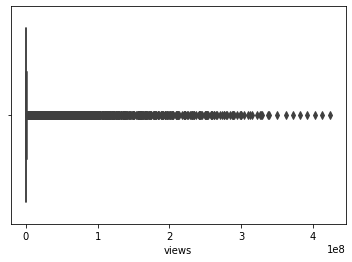

In [272]:
sns.boxplot(world_data.views)